## Plotting Data




Creating graphical output with python is typically achieved by using
third-party libraries. Each of these libraries has its own way of
describing graphical output, which can be very confusing. Furthermore,
some libraries provide an object-oriented interface as well as a
procedural interface. And to top it all, some libraries like pandas
implement their own interface to some of the graphics libraries (and
vice versa &#x2026;.). So if you start looking for help, you can find all
sorts of messy/conflicting advice.

For this course, we will use matplotlib with the pyplot object-oriented
interface. Matplotlib is widely used in the sciences, and the
interface is similar to Matlab. 

First, we import a dataset to play
with. As a new twist, I will also use a library that can test whether
a file is present or not. This is because I spent 20 minutes debugging
my code without realizing that I had the wrong filename. So I decided
to include this here. It may prove useful. The code is
straightforward and simply raises an error if the file is not
present. In order to test whether the file is present, we import
the os-library, which imports tools to deal with operating system
related tasks, like checking whether a file is present. I recommend to
use this code snippet in your own
submissions.  Towards
this end, I recommend starting to build a notebook of useful code
snippets (i.e., reading an excel file, plotting XY data, etc.. This
can be as simple as keeping a notebook file which contains all your
code fragments.)

So try this with a filename you know does not exist to see what will
happen!



In [1]:
import pandas as pd  # import pandas as pd
import pathlib as pl 

# define the file and sheetname we want to read. Note that the file
# has to be present in the local working directory!
fn: str = "Yao_2018-b.xlsx"  # file name
sn: str = "both"  # sheet name

# get the current working directory
cwd :pl.Path = pl.Path.cwd()
print(f"the current working directory is {cwd}")

# build the fully qualified file name (i.e. path + filename)
fqfn :pl.Path = f"{cwd}/{fn}"
print(fqfn)

# this little piece of code could have saved me 20 minutes
if not path.exists():  # check if the file is actually there
    raise FileNotFoundError(f"Cannot find file {fqfn}")

# read the excel sheet using pandas read_excel function and add it to
os_peak: pd.DataFrame = pd.read_excel(fqfn, sheet_name=sn)  # the pandas
# dataframe

# extract the data we need for plotting
Depth: pd.Series = os_peak.iloc[:, 1]
Age: pd.Series = os_peak.iloc[:, 2]
d34S: pd.Series = os_peak.iloc[:, 3]
d34Serror: pd.Series = os_peak.iloc[:, 4]
# lets test that we got the right dataset
print(os_peak.head())

the current working directory is /home/uliw/user/python-scripts/PNTA/working_with_libraries/Matplotlib
/home/uliw/user/python-scripts/PNTA/working_with_libraries/Matplotlib/Yao_2018-b.xlsx
  Core,section,interval(cm)  Depth [mbsf]  Age [Ma]       d34S  d34S error
0           1221C 11-3X 0-3        153.40   55.0011  17.516152    0.208391
1           1221C 11-3X 5-8        153.45   55.0184  17.575390    0.208391
2           1221C 11-3X 5-8        153.45   55.0184  17.680569    0.208391
3         1221C 11-3X 10-13        153.50   55.0358  17.737390    0.208391
4         1221C 11-3X 15-18        153.55   55.0531  17.886092    0.208391

## Matplotlib Pyplot



Creating plots is straightfoward and only requires a certain sequence
of commands. However, both, seaborn and matplotlib, provide two
different interfaces through which you can control the elements of a
graph. We will first use the procedural interface, which is the one
you will find in most online examples.



### The procedural interface versus the object oriented interface



 In the following
example, I give a typical command sequence. 

Line 1 creates a scatter plot (i.e., each coordinate pair is
represented by a point), and line 3 makes the plot appear. You may
ask, why would we need a command to make the plot appear? Plotting can
be computational expensive if you have a large dataset. So you don't
want to redraw your plot window each time you change a label etc. So
we first create all plot elements and then request that the plot is
being rendered with the `plt.show()` command. 



# Out [21]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

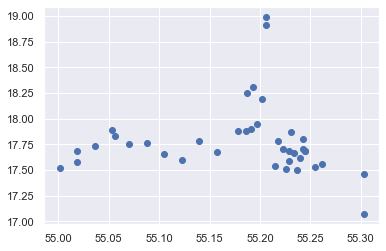

In [1]:
import matplotlib.pyplot as plt

plt.scatter(Age,d34S)      # create a scatter plot
plt.show()

 Using the procedural
interface is straightforward, but limited. Imagine you have two plots
in the same figure. If you try to set the x-axis label with
`plt.xlabel` which of the two xlabels will you change?



### Creating one or more plots



 Using
the object oriented approach avoids this problem quite
elegantly. First, we create (instantiate) a canvas. This object is a
container for one or more plots. In order to create a plot, we then
create a figure object. Since each plot figure has a name, we can then
use the figure object name to manipulate each plot object
independently. Most python programmers call the variable which holds
the canvas reference `fig` and the variable which holds the figure
reference is typically called `ax`.  Have a look at this example:



# Out [22]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

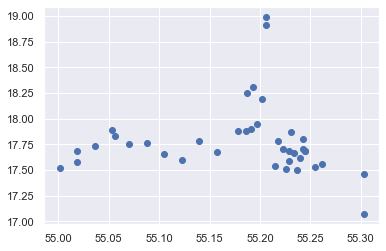

In [1]:
# Create a canvas with one figure object
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()  # 
ax.scatter(Age,d34S)     # Create a scatter plot for ax
plt.show()
fig.savefig("test_figure.pdf")

So what happens here: The `subplots` method creates a canvas (aka
`fig`), as well as a figure object (aka `ax`). The canvas contains
everything (potentially more than one figure), and the figure is all
the data, labels etc. Since we want plot a scatter plot, we call the
`scatter` method of the figure object. Then we call the `show()`
function of the `matplotlib.pyplot` library which will render the
figure. The last line uses the canvas handle to save the figure in pdf
format.

One more caveat: Note, that `plt.subplots()` is very different from
`plt.subplot()`. It is one of those unfortunate name choices which
creates plenty of confusion. Furthermore, examples on the internet are
often not clear about whether they use the procedural or the object
oriented interface. OK, now on to a plot with more than one figure
(axes)



# Out [23]: 
# text/plain
<Figure size 432x288 with 2 Axes>

# image/png

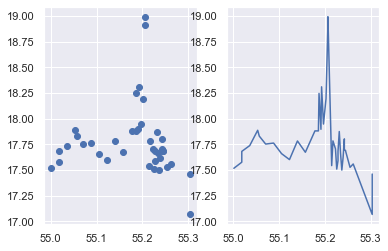

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax1: plt.Axes
ax2: plt.Axes

# Create a figure canvas with 2 plot objects
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)  # 
ax1.scatter(Age,d34S)  # Create a scatter plot for ax
ax2.plot(Age,d34S)     # Create lineplot for ax 2
plt.show()

Note that the figures may overlap. See the "Visual Candy" section
below how to remedy this. And now the same for 4 figures



# Out [24]: 
# text/plain
<Figure size 432x288 with 4 Axes>

# image/png

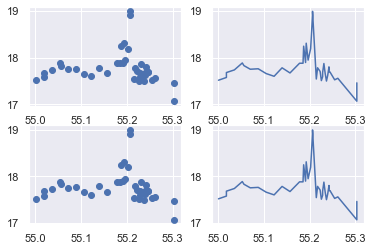

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
ax4: plt.Axes


# Create a figure canvas with 2 plot objects
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)  # 
ax1.scatter(Age,d34S)  # Create a scatter plot for ax
ax2.plot(Age,d34S)     # Create lineplot for ax 2
ax3.scatter(Age,d34S)  # Create a scatter plot for ax
ax4.plot(Age,d34S)     # Create lineplot for ax 2
plt.show()

Note how the `subplots` method returns the axis (figure) handles as a
list of lists. In other words, row elements, are returned as a list of
axis handles, those lists are elements of another list. If this is
hard to understand, please speak up!



### Controlling figure size




Using the canvas (fig) handle, we can control almost any aspect of our
figure (try and query the fig-handle with `dir()`). Here we use the
command in line 4, set the figure size to 6 by 4 inches



# Out [25]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

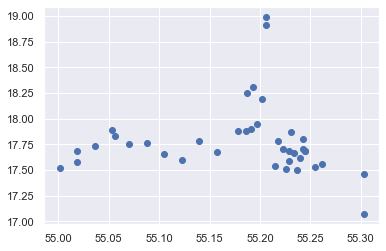

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()  #
fig.set_size_inches(6,4)
ax.scatter(Age,d34S)    # Create a scatter plot for ax
plt.show()
fig.savefig("test_figure.pdf")

### Labels, title, and math symbols



Now, lets add a few bells and whistles to our plot



# Out [7]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

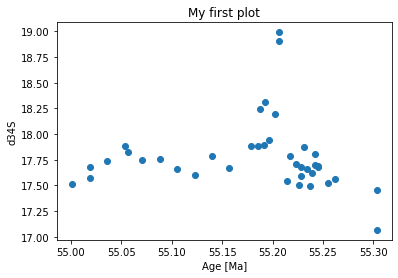

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S)
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("d34S")
plt.show()
fig.savefig("test_figure.pdf")

we can also add math symbols to the text. Matplotlib understands most
LaTeX math symbols and will render them correctly if they are enclosed
in dollar signs (see below). [See this link for a fairly complete list.](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)



# Out [8]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

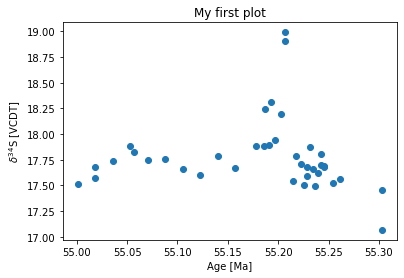

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S)
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("$\delta^{34}$S [VCDT] ")
plt.show()
fig.savefig("test_figure.pdf")

### Legends, and arbitrary text, and visual clutter




This is now straightforward. The only noteworthy thing, is that the
location of e.g., the arbitrary text, is given the local coordinates
of the data.



# Out [9]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

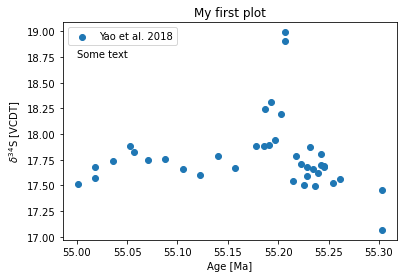

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S)
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("$\delta^{34}$S [VCDT] ")
ax.legend(["Yao et al. 2018"])             # The legend
ax.text(55,18.75,"Some text")          # Some arbitrary text
plt.show()
fig.savefig("test_figure.pdf")

The black frame around the figure (and legend), is a figure element
without function. A better word is visual clutter, which distracts
from the actual information. Let's remove the elements we do not
need. For the legend, we can simply add an option to suppress the
frame, and for the top and right spine, we can render them invisible
by specifying a non-color.



# Out [10]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

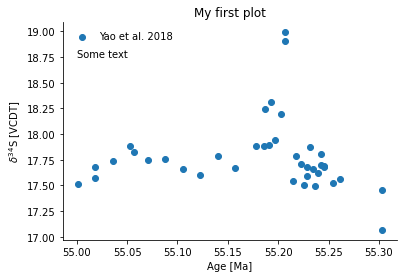

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S)
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("$\delta^{34}$S [VCDT] ")
ax.legend(["Yao et al. 2018"],
          frameon=False)             # The legend
ax.text(55,18.75,"Some text")          # Some arbitrary text
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()
fig.savefig("test_figure.pdf")

### Adding a second data set and choosing colors



Is as simple as calling the axis object again. Here we use the same
dataset, but with a different plot method. 



# Out [11]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

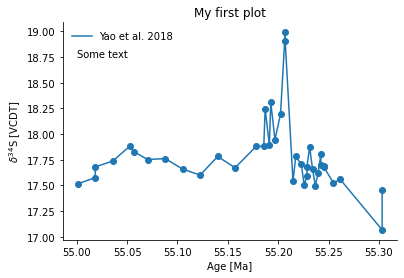

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S)
ax.plot(Age,d34S)
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("$\delta^{34}$S [VCDT] ")
ax.legend(["Yao et al. 2018"],
          frameon=False)             # The legend
ax.text(55,18.75,"Some text")          # Some arbitrary text
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()
fig.savefig("test_figure.pdf")

 it would be nice though, if we
could control color. There are many ways to specify color, and color
use in figures is a whole science in itself (think about color
blindness which affects 30% of the population). I recommend to stick
to the default color map. Those colors are named `"C0"`, `"C1"`,
`"C2"` etc. Simply append `color = "C0"` to the plot command, and you
are good to go.



# Out [12]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

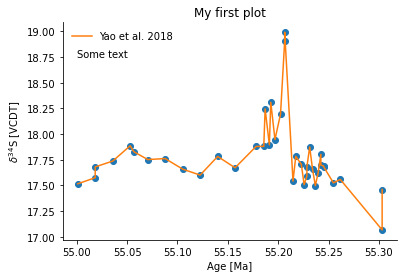

In [1]:
import matplotlib.pyplot as plt

fig: plt.Figure
ax: plt.Axes

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S,color="C0")
ax.plot(Age,d34S,color="C1")
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("$\delta^{34}$S [VCDT] ")
ax.legend(["Yao et al. 2018"],
          frameon=False)             # The legend
ax.text(55,18.75,"Some text")          # Some arbitrary text
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()
fig.savefig("test_figure.pdf")

Note, that once you are adding elements to a graph, that these are
layered on top of each other. So it matter whether you first plot the
scatter-plot, or the lineplot. Reverse the sequence above, and observe
what changes in your plot.



### Visual candy



The default plot style is utilitarian, but not particularly
pretty. The Plot style is fortunately independent of the plot
commands. Below we import the seaborn plot library, and then use it's
'darkgrid' style to polish our plot.



# Out [13]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

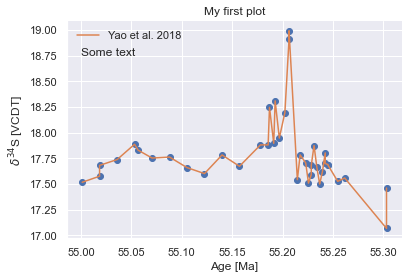

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.scatter(Age,d34S,color="C0")
ax.plot(Age,d34S,color="C1")
ax.set_title("My first plot")
ax.set_xlabel("Age [Ma]")
ax.set_ylabel("$\delta^{34}$S [VCDT] ")
ax.legend(["Yao et al. 2018"],
          frameon=False)            
ax.text(55,18.75,"Some text")          
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()
fig.savefig("test_figure.pdf")

If you check the actual pdf file which is saved by the above code, you
may find that some of the label text is cut off. To prevent this, we
add the `fig.tight_layout()` command before `plt.show`. So now, we
have a pretty good template we can use in our code! 



# Out [14]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

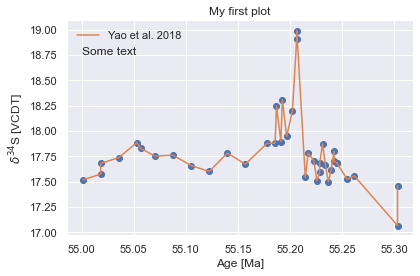

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()  # create plot canvas
fig.set_size_inches(6,4)  # set figure size
ax.scatter(Age,d34S,color="C0") # scatter plot
ax.plot(Age,d34S,color="C1")    # line plot
ax.set_title("My first plot")   # title
ax.set_xlabel("Age [Ma]")       # x label
ax.set_ylabel("$\delta^{34}$S [VCDT] ")     # y-label
ax.legend(["Yao et al. 2018"],
          frameon=False) # The legend wo frame
ax.text(55,18.75,"Some text")  # Some arbitrary text
ax.spines['right'].set_color('none') # do not display the right spine
ax.spines['top'].set_color('none')   # do not display the right spine
fig.tight_layout()                   # tighten up layout
plt.show()                           # render the figure
fig.savefig("test_figure.pdf")       # save the figure

### Data with a shared x-axis, but independent y-axis



At times, you will need to plot data which shares the time-axis, but
has independent y-axis (say concentration versus isotope ratio). This
can be achieved by creating a twin of the first axes (figure)
object. See line 16 below: 



# Out [15]: 
# text/plain
<Figure size 432x288 with 2 Axes>

# image/png

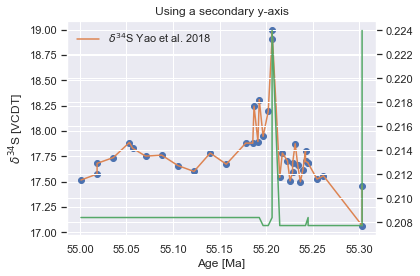

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()  # create plot canvas
fig.set_size_inches(6,4)  # set figure size

ax.scatter(Age,d34S,color="C0") # scatter plot
ax.plot(Age,d34S,color="C1")    # line plot
ax.set_title("Using a secondary y-axis")   # title
ax.set_xlabel("Age [Ma]")       # x label
ax.set_ylabel("$\delta^{34}$S [VCDT] ")     # y-label
ax.legend(["$\delta^{34}$S Yao et al. 2018"],
          frameon=False) # The legend wo frame

axt = ax.twinx()
axt.plot(Age,d34Serror,color="C2")

ax.spines['top'].set_color('none')   # do not display the right spine
fig.tight_layout()                   # tighten up layout
plt.show()                           # render the figure
fig.savefig("test_figure.pdf")       # save the figure

Not very pretty yet, so let's control the plot-scale and add a legend



# Out [16]: 
# text/plain
<Figure size 432x288 with 2 Axes>

# image/png

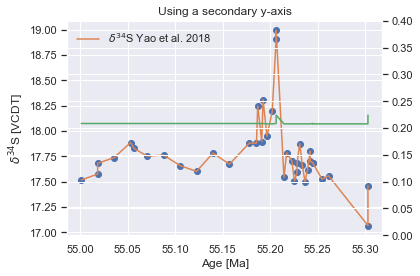

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()  # create plot canvas
fig.set_size_inches(6,4)  # set figure size

ax.scatter(Age,d34S,color="C0") # scatter plot
ax.plot(Age,d34S,color="C1")    # line plot
ax.set_title("Using a secondary y-axis")   # title
ax.set_xlabel("Age [Ma]")       # x label
ax.set_ylabel("$\delta^{34}$S [VCDT] ")     # y-label
ax.legend(["$\delta^{34}$S Yao et al. 2018"],
          frameon=False) # The legend wo frame

axt = ax.twinx()
axt.plot(Age,d34Serror,color="C2")
axt.set_ylim([0,0.4])

ax.spines['top'].set_color('none')   # do not display the right spine
fig.tight_layout()                   # tighten up layout
plt.show()                           # render the figure
fig.savefig("test_figure.pdf")       # save the figure

somewhat better, but adding a legend is messy, since it is independent of `ax`



# Out [17]: 
# text/plain
<Figure size 432x288 with 2 Axes>

# image/png

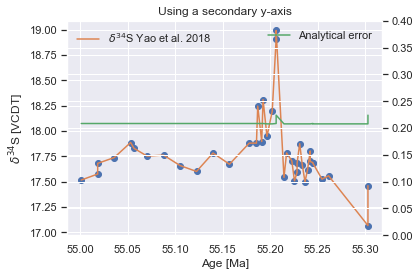

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()  # create plot canvas
fig.set_size_inches(6,4)  # set figure size

ax.scatter(Age,d34S,color="C0") # scatter plot
ax.plot(Age,d34S,color="C1")    # line plot
ax.set_title("Using a secondary y-axis")   # title
ax.set_xlabel("Age [Ma]")       # x label
ax.set_ylabel("$\delta^{34}$S [VCDT] ")     # y-label
ax.legend(["$\delta^{34}$S Yao et al. 2018"],
          frameon=False) # The legend wo frame

axt = ax.twinx()
axt.plot(Age,d34Serror,color="C2")
axt.set_ylim([0,0.4])
axt.legend(["Analytical error"],
           frameon=False)

ax.spines['top'].set_color('none')   # do not display the right spine
fig.tight_layout()                   # tighten up layout
plt.show()                           # render the figure
fig.savefig("test_figure.pdf")       # save the figure

There are a couple of ways around this, and they are summarized in this stackoverflow post:

-   [secondary-axis-with-twinx-how-to-add-to-legend](https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend)

for our purposes, it is enough to position the legends manually. The
location information is given in percent relative to the lower left
corner. A bit of a hack, but it
works. 



# Out [18]: 
# text/plain
<Figure size 432x288 with 2 Axes>

# image/png

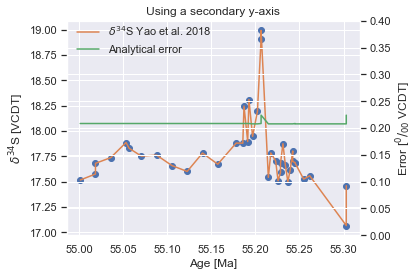

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()  # create plot canvas
fig.set_size_inches(6,4)  # set figure size

ax.scatter(Age,d34S,color="C0") # scatter plot
ax.plot(Age,d34S,color="C1")    # line plot
ax.set_title("Using a secondary y-axis")   # title
ax.set_xlabel("Age [Ma]")       # x label
ax.set_ylabel("$\delta^{34}$S [VCDT] ")     # y-label

ax.legend(["$\delta^{34}$S Yao et al. 2018"],
          loc=(0.02, 0.9),
          frameon=False ) # The legend wo frame

axt = ax.twinx()
axt.plot(Age,d34Serror,color="C2")
axt.set_ylim([0,0.4])

axt.legend(["Analytical error"],
           loc=(0.02,0.82),
           frameon=False)

axt.set_ylabel("Error [$^{0}/_{00}$ VCDT]")

ax.spines['top'].set_color('none')   # do not display the right spine
fig.tight_layout()                   # tighten up layout
plt.show()                           # render the figure
fig.savefig("test_figure.pdf")       # save the figure

### Adding errors bars



The above plot demonstrates how to implement a second y-axis. It is
however a lousy plot. I would be much better if we add the analytical
error directly to the measured data as
error-bars. 



# Out [19]: 
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

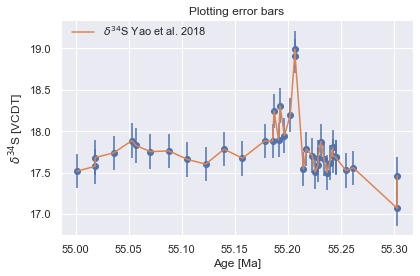

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

fig: plt.Figure
ax: plt.Axes

sns.set(style='darkgrid') # use seaborn style with a dark grid

fig, ax = plt.subplots()  # create plot canvas
fig.set_size_inches(6,4)  # set figure size

# Add Scatter plot
ax.scatter(Age,d34S,color="C0")

# Add line plot
ax.plot(Age,d34S,color="C1")

# Add error bars
ax.errorbar(Age,   # x values
            d34S,  # y values
            yerr=d34Serror, # y-error, single value or list of values
            color="C0",     # color
            fmt="none")     # none = plot only error bars

# set title and labels
ax.set_title("Plotting error bars") # the plot title
ax.set_xlabel("Age [Ma]")       # x label
ax.set_ylabel("$\delta^{34}$S [VCDT] ")     # y-label

# add legend
ax.legend(["$\delta^{34}$S Yao et al. 2018"],
          loc=(0.02, 0.9),
          frameon=False ) # The legend wo frame

# clean up clutter, plot and save figure
ax.spines['top'].set_color('none')   # do not display the right spine
fig.tight_layout()                   # tighten up layout
plt.show()                           # render the figure
fig.savefig("test_figure.pdf")       # save the figure

### Recap



-   Matplotlib refers to the figure canvas as `figure` and to
    individual plot(s) within a figure as `axes`
    -   Matplotlib supports a procedural as well as an object oriented
        interface. Commands used in both approaches, often have similar
        names but different meaning. Care must be taken to differentiate
        between both methods when perusing examples found in books or the
        on the internet.
    -   The object oriented interface allows you to modify plot elements
        in great detail (there is basically no limit), but it may be
        tedious to so.
    -   Matplotlib plots can be styled see: [style-sheets-reference.html](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)
    -   No one can remember all the different plot commands. So it is best
        to keep a generic code template

